In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
extorsion_df = pd.read_csv('../../Data/EXTORSI_N.csv')
extorsion_df

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,01/01/1996 12:00:00 AM,11,BOGOTÁ D.C.,11001,BOGOTA D.C.,1
1,01/01/1996 12:00:00 AM,50,META,50689,SAN MARTIN,1
2,01/02/1996 12:00:00 AM,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",2
3,01/02/1996 12:00:00 AM,54,NORTE DE SANTANDER,54001,CUCUTA,1
4,01/03/1996 12:00:00 AM,20,CESAR,20001,VALLEDUPAR,1
...,...,...,...,...,...,...
69132,05/23/2022 12:00:00 AM,15,BOYACÁ,15759,SOGAMOSO,1
69133,05/23/2022 12:00:00 AM,19,CAUCA,19001,POPAYAN,1
69134,05/23/2022 12:00:00 AM,66,RISARALDA,66170,DOSQUEBRADAS,1
69135,05/23/2022 12:00:00 AM,70,SUCRE,70820,SANTIAGO DE TOLU,1


# 1. Exploracion de los datos

In [9]:
extorsion_df.shape

(69137, 6)

In [8]:
extorsion_df.dtypes

FECHA HECHO     object
COD_DEPTO        int64
DEPARTAMENTO    object
COD_MUNI         int64
MUNICIPIO       object
CANTIDAD         int64
dtype: object

### Revision de datos NaN o faltantes

In [37]:
extorsion_df.isna().sum()

FECHA HECHO     0
COD_DEPTO       0
DEPARTAMENTO    0
COD_MUNI        0
MUNICIPIO       0
CANTIDAD        0
dtype: int64

## 1.1 Analizando la columna DEPARTAMENTO

In [19]:
departamentos = list(extorsion_df['DEPARTAMENTO'].unique())
departamentos.sort()
departamentos

['AMAZONAS',
 'ANTIOQUIA',
 'ARAUCA',
 'ATLÁNTICO',
 'BOGOTÁ D.C.',
 'BOLÍVAR',
 'BOYACÁ',
 'CALDAS',
 'CAQUETÁ',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCÓ',
 'CUNDINAMARCA',
 'CÓRDOBA',
 'GUAINÍA',
 'GUAVIARE',
 'HUILA',
 'LA GUAJIRA',
 'MAGDALENA',
 'META',
 'NARIÑO',
 'NORTE DE SANTANDER',
 'PUTUMAYO',
 'QUINDÍO',
 'RISARALDA',
 'SAN ANDRÉS ISLAS',
 'SANTANDER',
 'SUCRE',
 'TOLIMA',
 'VALLE DEL CAUCA',
 'VAUPÉS',
 'VICHADA']

In [29]:
len(departamentos)

33

<AxesSubplot:xlabel='Count', ylabel='DEPARTAMENTO'>

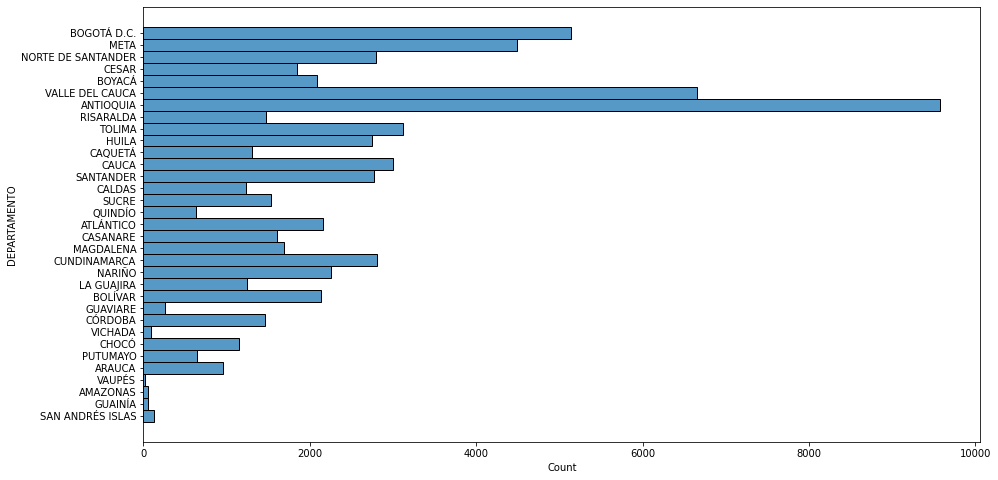

In [28]:
plt.figure(figsize=(15,8))
sns.histplot(data=extorsion_df, y="DEPARTAMENTO")

## 1.2 Analizando la columna MUNICIPIO

In [35]:
municipios = list(extorsion_df['MUNICIPIO'].unique())
municipios.sort()
municipios[:10]

['ABEJORRAL',
 'ABREGO',
 'ABRIAQUI',
 'ACACIAS',
 'ACANDI',
 'ACEVEDO',
 'ACHI',
 'AGRADO',
 'AGUA DE DIOS',
 'AGUACHICA']

In [32]:
len(municipios)

989

## 1.3 Analizando la columna CANTIDAD

In [41]:
extorsion_df['CANTIDAD'].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  9,  8, 11, 16, 13, 19, 17, 10, 21, 15,
       20, 12, 27, 89, 35, 14], dtype=int64)

<AxesSubplot:xlabel='CANTIDAD', ylabel='Count'>

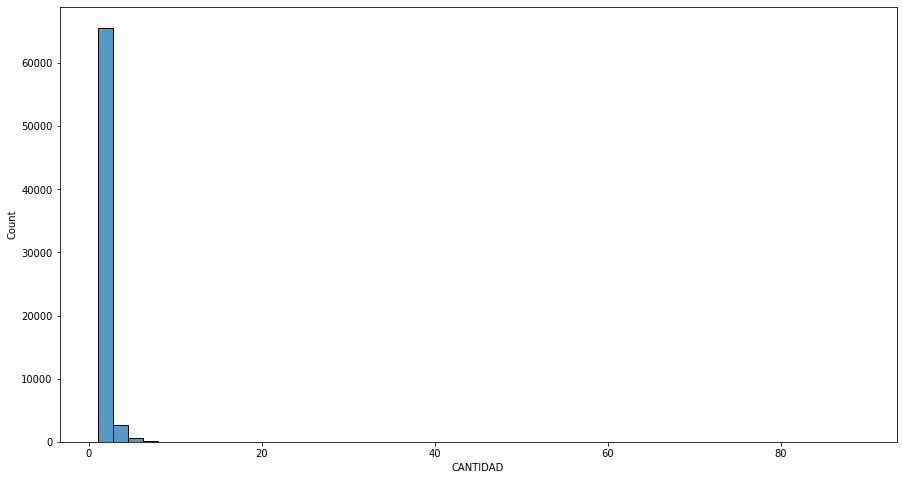

In [44]:
plt.figure(figsize=(15,8))
sns.histplot(data=extorsion_df, x="CANTIDAD", bins=50)

# 2. Limpieza y transformacion de los datos

## 2.1. Cambio del formato de fecha a datetime

In [49]:
extorsion_df['FECHA HECHO']

0        01/01/1996 12:00:00 AM
1        01/01/1996 12:00:00 AM
2        01/02/1996 12:00:00 AM
3        01/02/1996 12:00:00 AM
4        01/03/1996 12:00:00 AM
                  ...          
69132    05/23/2022 12:00:00 AM
69133    05/23/2022 12:00:00 AM
69134    05/23/2022 12:00:00 AM
69135    05/23/2022 12:00:00 AM
69136    05/23/2022 12:00:00 AM
Name: FECHA HECHO, Length: 69137, dtype: object

In [50]:
extorsion_df['FECHA HECHO'] = pd.to_datetime(extorsion_df['FECHA HECHO'])
extorsion_df

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,1996-01-01,11,BOGOTÁ D.C.,11001,BOGOTA D.C.,1
1,1996-01-01,50,META,50689,SAN MARTIN,1
2,1996-01-02,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",2
3,1996-01-02,54,NORTE DE SANTANDER,54001,CUCUTA,1
4,1996-01-03,20,CESAR,20001,VALLEDUPAR,1
...,...,...,...,...,...,...
69132,2022-05-23,15,BOYACÁ,15759,SOGAMOSO,1
69133,2022-05-23,19,CAUCA,19001,POPAYAN,1
69134,2022-05-23,66,RISARALDA,66170,DOSQUEBRADAS,1
69135,2022-05-23,70,SUCRE,70820,SANTIAGO DE TOLU,1


# 3. Almacenamiento de los datos procesados

In [52]:
extorsion_df.to_csv('../../Data/DATOS_LIMPIOS/extorsion.csv', encoding='utf-8', index=False)